In [9]:
import pandas as pd
import os

directory = 'data'

dataframes = []

for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('League of Legends Champion Stats'):
        patch_version = filename.split('Stats ')[1].replace('.csv', '')

        df = pd.read_csv(os.path.join(directory, filename), sep=';')

        df['Patch'] = patch_version

        dataframes.append(df)

final_df = pd.concat(dataframes, ignore_index=True)

for column in ['Win %', 'Role %', 'Pick %', 'Ban %']:
    final_df[column] = final_df[column].str.rstrip('%').astype('float')

for column in ['Score', 'Trend', 'KDA']:
    final_df[column] = final_df[column].astype('float')


final_df.to_csv('data/data.csv')
final_df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA,Patch
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97,94.62,4.43,2.03,1.97,12.1
1,Ahri,Mage,MID,A,53.21,-0.24,49.93,93.47,4.62,1.04,2.56,12.1
2,Akali,Assassin,MID,S,65.30,6.51,48.59,65.65,8.16,12.88,2.34,12.1
3,Akali,Assassin,TOP,A,57.87,3.34,48.57,34.06,4.24,12.88,2.04,12.1
4,Akshan,Marksman,MID,S,59.85,0.65,51.46,58.01,4.83,21.91,2.23,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
8466,Zilean,Support,MID,A,50.82,1.36,53.18,13.26,0.32,0.87,3.38,13.9
8467,Zilean,Support,SUPPORT,A,47.44,-0.21,50.85,82.90,2.09,0.87,2.93,13.9
8468,Zoe,Mage,MID,A,49.63,0.67,50.02,86.88,2.92,1.99,2.59,13.9
8469,Zoe,Mage,SUPPORT,D,33.17,-3.59,47.67,11.13,0.36,1.97,2.13,13.9


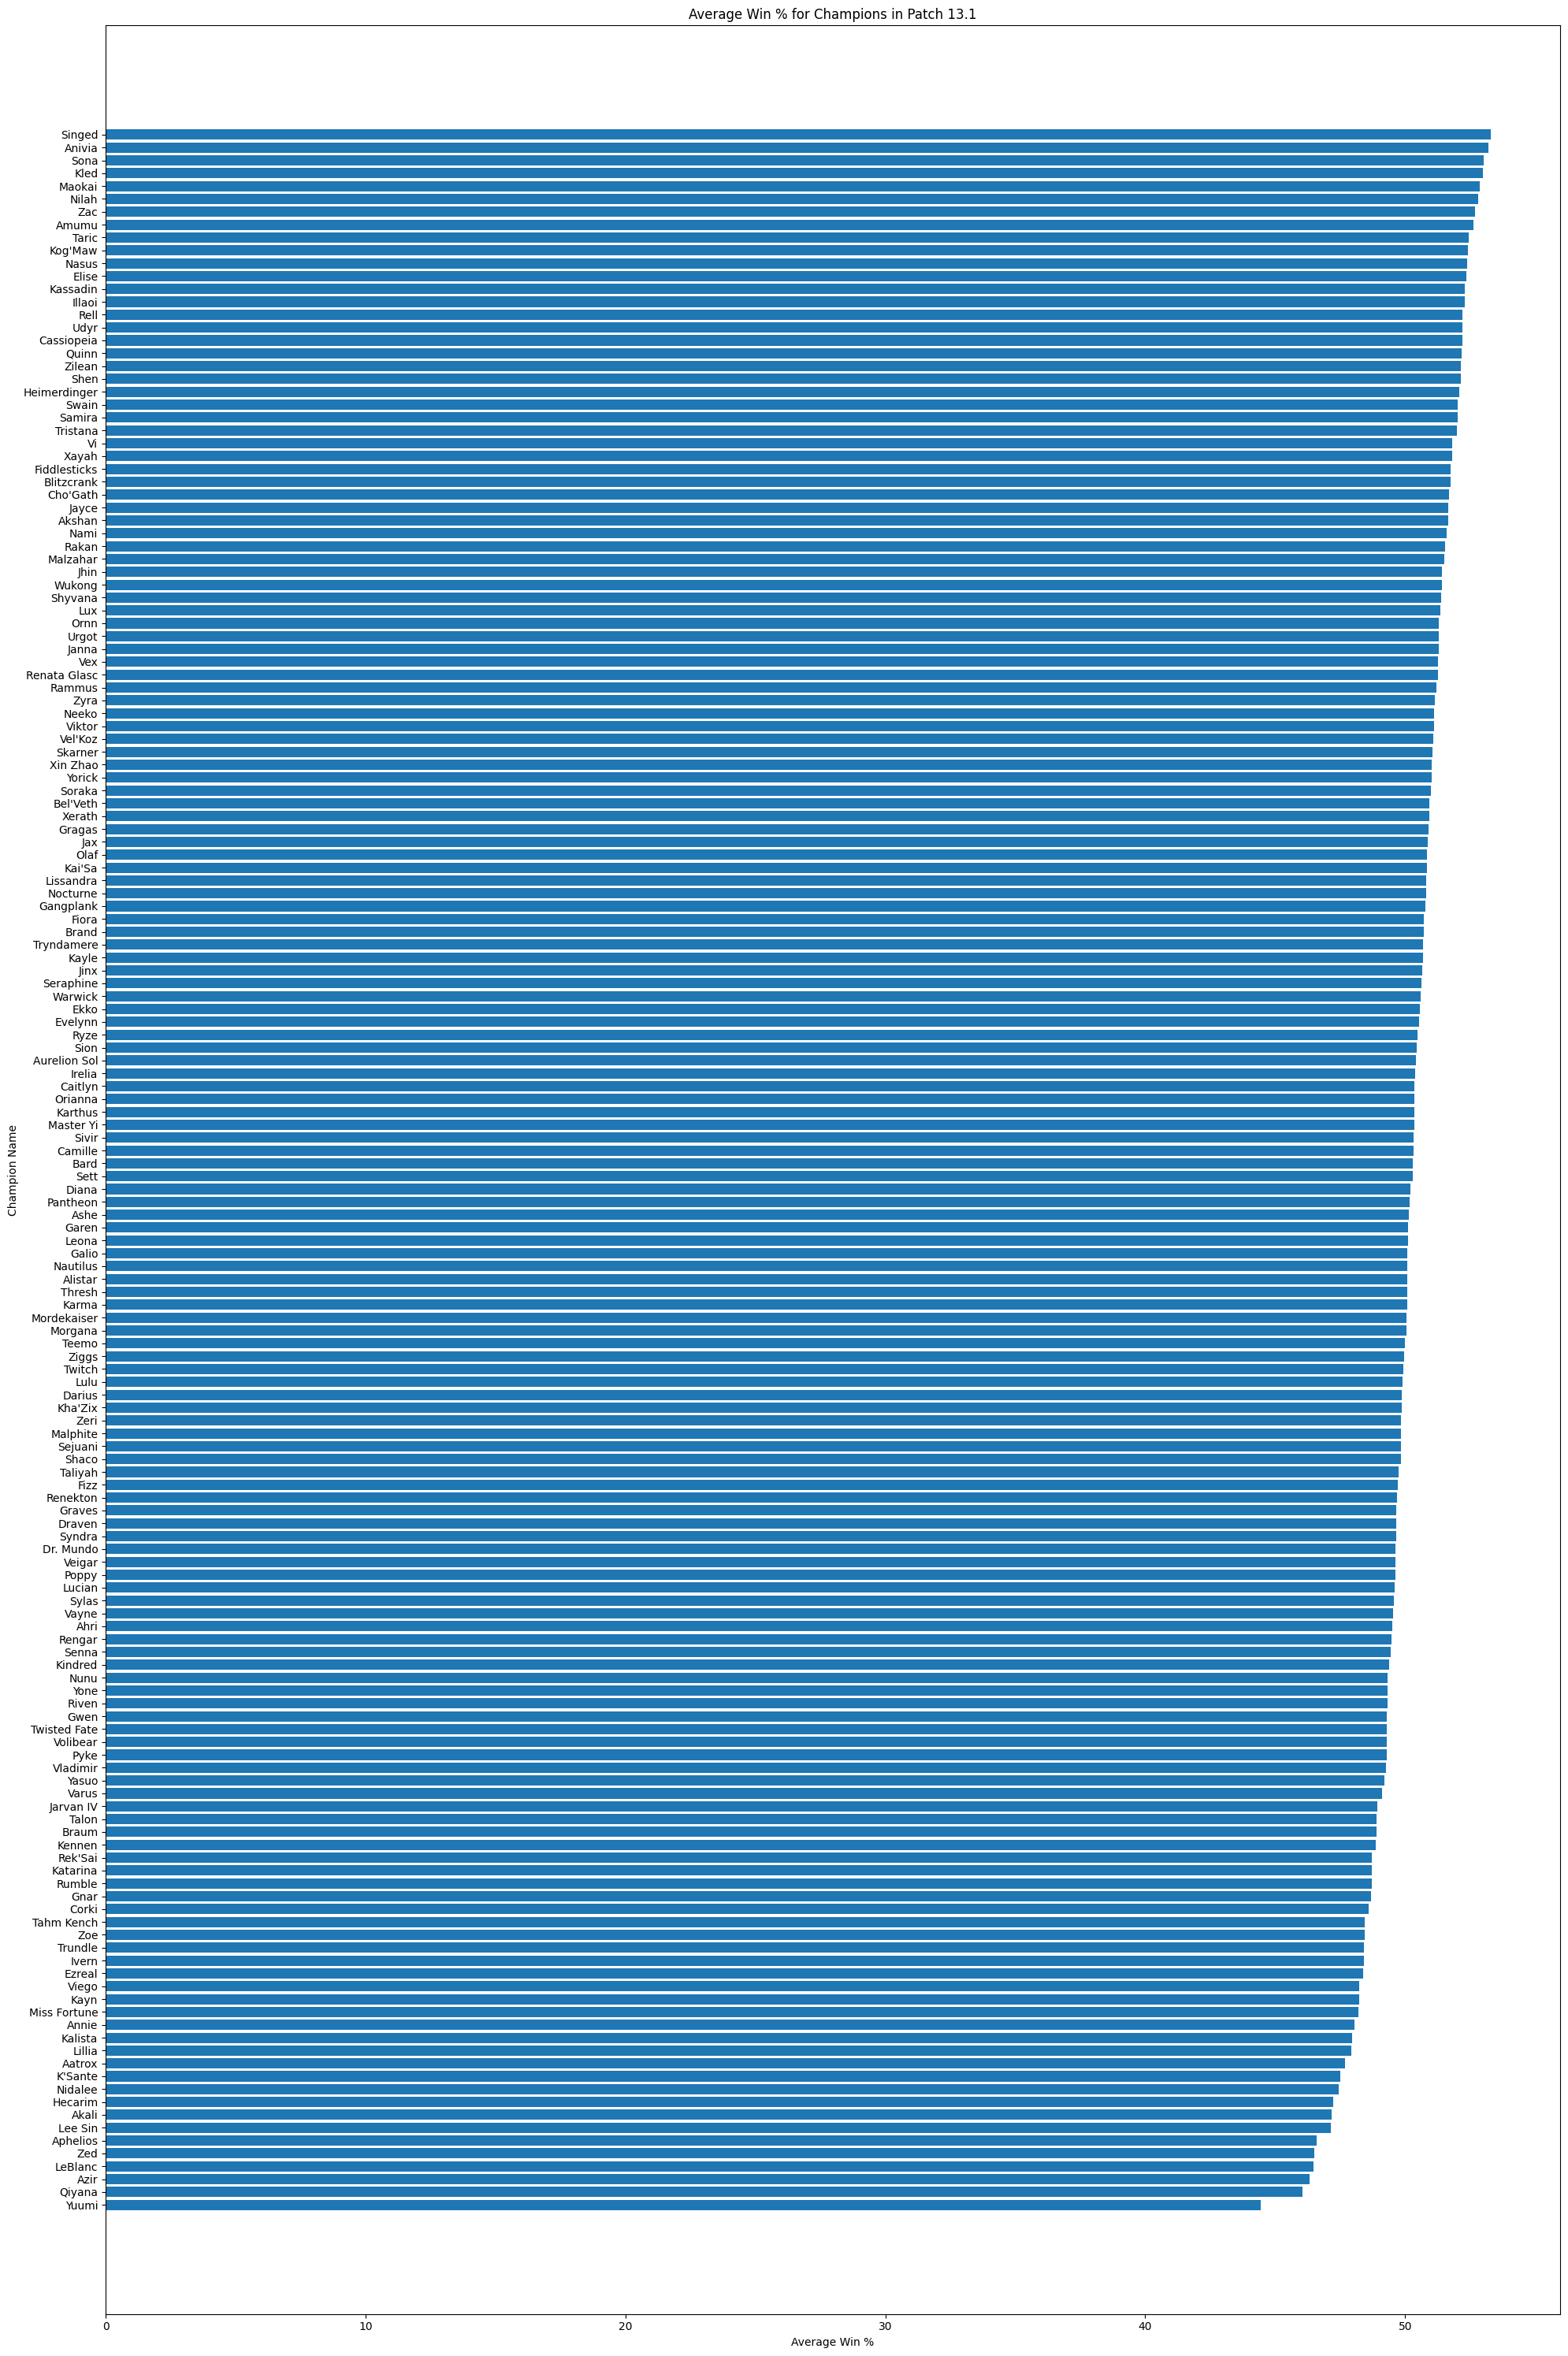

In [10]:
import matplotlib.pyplot as plt

patch_df = final_df[final_df['Patch'] == '13.1']

avg_win_rates = patch_df.groupby('Name')['Win %'].mean().reset_index()

avg_win_rates = avg_win_rates.sort_values(by='Win %', ascending=True)
plt.figure(figsize=(20, 30))
plt.barh(avg_win_rates['Name'], avg_win_rates['Win %'])
plt.xlabel('Average Win %')
plt.ylabel('Champion Name')
plt.title('Average Win % for Champions in Patch 13.1')
plt.tight_layout()
plt.show()